<h1 align=center> Liver Health Prediction </h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,RocCurveDisplay
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

In [2]:
data = pd.read_csv('./Indian_Liver_Patient_Dataset.csv')
data.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,TP,ALB,AG,Liver,Patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      583 non-null    int64  
 1   Gender   583 non-null    object 
 2   TB       583 non-null    float64
 3   DB       583 non-null    float64
 4   Alkphos  583 non-null    int64  
 5   Sgpt     583 non-null    int64  
 6   TP       583 non-null    int64  
 7   ALB      583 non-null    float64
 8   AG       583 non-null    float64
 9   Liver    579 non-null    float64
 10  Patient  583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [4]:
data.isnull().mean()*100

Age        0.000000
Gender     0.000000
TB         0.000000
DB         0.000000
Alkphos    0.000000
Sgpt       0.000000
TP         0.000000
ALB        0.000000
AG         0.000000
Liver      0.686106
Patient    0.000000
dtype: float64

In [5]:
data.dropna(inplace=True)

In [6]:
data.shape

(579, 11)

In [7]:
data.Patient.unique()

array([1, 2], dtype=int64)

In [8]:
data["Gender"] = LabelEncoder().fit_transform(data["Gender"])

In [9]:
data.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,TP,ALB,AG,Liver,Patient
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [10]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

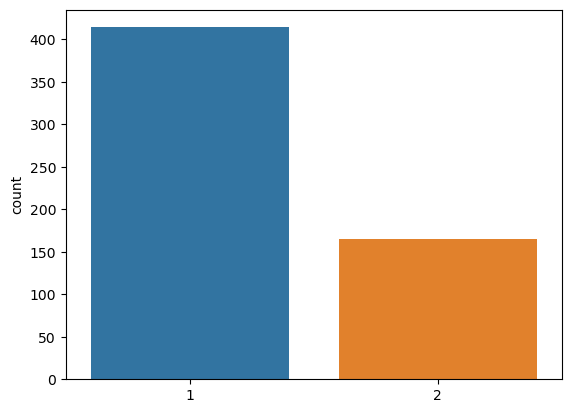

In [11]:
sns.countplot(x=Y)
plt.show()

In [12]:
X,Y = SMOTE().fit_resample(X,Y)

In [13]:
models = {
    "LogisticRegression":LogisticRegression(),
    "RandomForestClassifier":RandomForestClassifier(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "KNeighborsClassifier":KNeighborsClassifier()
}

In [14]:
for name,model in models.items():
    scores = cross_val_score(model,X,Y,scoring="accuracy",n_jobs=-1,cv=10)
    print("Cross validation model {}".format(name))
    print("Mean score:",np.mean(scores)*100)
    print("*"*100)

Cross validation model LogisticRegression
Mean score: 69.47252424331472
****************************************************************************************************
Cross validation model RandomForestClassifier
Mean score: 78.16926241551572
****************************************************************************************************
Cross validation model DecisionTreeClassifier
Mean score: 71.17102556567734
****************************************************************************************************
Cross validation model AdaBoostClassifier
Mean score: 71.64560681751395
****************************************************************************************************
Cross validation model GradientBoostingClassifier
Mean score: 75.52159858947986
****************************************************************************************************
Cross validation model KNeighborsClassifier
Mean score: 75.39377020276228
*********************************************

### RandomForestClassifier

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=43,shuffle=True)

In [16]:
Model = RandomForestClassifier()

In [17]:
Model.fit(X_train,Y_train)
print("Model trained with KNeighborsClassifier")
train_score = accuracy_score(Y_train,Model.predict(X_train))
test_score = accuracy_score(Y_test,Model.predict(X_test))
conf_train = confusion_matrix(Y_train,Model.predict(X_train))
conf_test = confusion_matrix(Y_test,Model.predict(X_test))
print("Model training accuracy :",train_score)
print("Model testing accuracy :",test_score)
print("Confusion Matrix train :",conf_train)
print("Confusion matrix test :",conf_test)
print("Wrong predictions made :",((Y_test !=Model.predict(X_test)).sum(),"/",
                                 ((Y_test == Model.predict(X_test)).sum()+
                                  (Y_test != Model.predict(X_test)).sum())))

Model trained with KNeighborsClassifier
Model training accuracy : 1.0
Model testing accuracy : 0.8132530120481928
Confusion Matrix train : [[334   0]
 [  0 328]]
Confusion matrix test : [[62 18]
 [13 73]]
Wrong predictions made : (31, '/', 166)


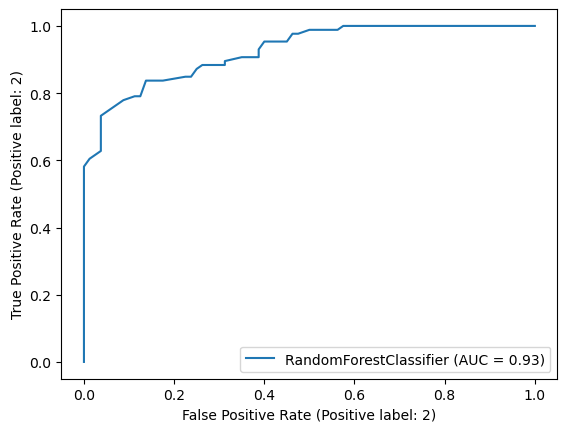

In [18]:
ROC_display = RocCurveDisplay.from_estimator(Model,X_test,Y_test)